# Import Libraries

In [125]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Obtain Data

Read data from csv file to df and set date as the index

In [22]:
columns = ['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 
           'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 
           'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 
           'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']
df = pd.read_csv('water-treatment.data', header=None, names=columns)
df.set_index('Date', inplace=True)
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Date,,,,,,,,,,,,,,,,,,,,,
D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


# Scrub Data

In [28]:
replace_dict = {'?' : np.nan}
df.replace(replace_dict, inplace=True)
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Date,,,,,,,,,,,,,,,,,,,,,
D-1/3/90,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,7.9,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
D-2/3/90,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,7.7,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
D-4/3/90,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,7.7,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, D-1/3/90 to D-30/8/91
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       509 non-null    object 
 1   ZN-E      524 non-null    object 
 2   PH-E      527 non-null    float64
 3   DBO-E     504 non-null    object 
 4   DQO-E     521 non-null    object 
 5   SS-E      526 non-null    object 
 6   SSV-E     516 non-null    object 
 7   SED-E     502 non-null    object 
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     487 non-null    object 
 11  SS-P      527 non-null    int64  
 12  SSV-P     516 non-null    object 
 13  SED-P     503 non-null    object 
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     499 non-null    object 
 17  DQO-D     518 non-null    object 
 18  SS-D      525 non-null    object 
 19  SSV-D     514 non-null    object 
 20  SED-D     502 non-null  

In [36]:
df.dropna(inplace=True)
df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, D-5/3/90 to D-29/8/91
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       380 non-null    float64
 1   ZN-E      380 non-null    float64
 2   PH-E      380 non-null    float64
 3   DBO-E     380 non-null    float64
 4   DQO-E     380 non-null    float64
 5   SS-E      380 non-null    float64
 6   SSV-E     380 non-null    float64
 7   SED-E     380 non-null    float64
 8   COND-E    380 non-null    float64
 9   PH-P      380 non-null    float64
 10  DBO-P     380 non-null    float64
 11  SS-P      380 non-null    float64
 12  SSV-P     380 non-null    float64
 13  SED-P     380 non-null    float64
 14  COND-P    380 non-null    float64
 15  PH-D      380 non-null    float64
 16  DBO-D     380 non-null    float64
 17  DQO-D     380 non-null    float64
 18  SS-D      380 non-null    float64
 19  SSV-D     380 non-null    float64
 20  SED-D     380 non-null  

# Explore Data

In [49]:
df.describe().iloc[:,0:12]

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,DBO-P,SS-P
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,37371.671053,2.277263,7.825263,189.628947,403.971053,226.805263,60.858421,4.685789,1468.431579,7.851053,209.668421,257.394737
std,6851.660908,2.328609,0.236607,61.373778,117.855091,118.077985,12.660505,2.907893,393.605113,0.223958,71.917173,147.332525
min,10050.000000,0.100000,7.300000,48.000000,105.000000,98.000000,13.200000,0.400000,651.000000,7.300000,59.000000,104.000000
25%,32993.500000,0.900000,7.700000,148.000000,324.000000,168.000000,55.225000,3.200000,1185.000000,7.700000,159.000000,184.000000
50%,36091.500000,1.500000,7.800000,183.000000,400.000000,196.000000,63.550000,4.500000,1395.500000,7.800000,204.000000,220.000000
75%,41576.250000,3.000000,8.000000,225.250000,470.250000,242.500000,69.600000,5.500000,1674.250000,8.000000,250.000000,276.500000
max,60081.000000,19.100000,8.500000,438.000000,941.000000,1228.000000,84.800000,36.000000,3230.000000,8.500000,449.000000,1692.000000


In [47]:
df.describe().iloc[:,12:24]

,SSV-P,SED-P,COND-P,PH-D,DBO-D,DQO-D,SS-D,SSV-D,SED-D,COND-D,PH-S,DBO-S
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,59.680263,5.117105,1484.618421,7.835263,122.589474,272.984211,93.910526,72.723158,0.414211,1477.692105,7.720526,18.734211
std,12.733015,3.577671,398.602823,0.195243,36.528803,70.953437,23.438853,10.394320,0.378175,401.094252,0.153412,9.607351
min,7.100000,1.000000,646.000000,7.300000,26.000000,100.000000,49.000000,23.800000,0.000000,85.000000,7.100000,5.000000
25%,53.175000,3.300000,1207.750000,7.700000,98.000000,222.000000,78.000000,67.275000,0.200000,1213.500000,7.600000,14.000000
50%,61.950000,4.500000,1412.500000,7.800000,121.000000,274.000000,90.000000,74.200000,0.300000,1420.500000,7.700000,17.000000
75%,68.800000,6.000000,1724.000000,8.000000,148.000000,323.000000,106.000000,78.900000,0.500000,1698.750000,7.800000,22.000000
max,93.500000,46.000000,3170.000000,8.300000,223.000000,463.000000,244.000000,100.000000,3.500000,3690.000000,8.100000,152.000000


In [50]:
df.describe().iloc[:,24:36]

,DQO-S,SS-S,SSV-S,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,84.131579,20.913158,79.683684,0.036132,1481.521053,39.126316,58.899211,90.647368,84.106579,68.650789,89.528158,78.341579
std,33.663060,11.546640,9.238465,0.200343,384.278191,14.927089,12.955977,8.913159,6.933349,10.515217,5.450973,8.228383
min,9.000000,8.000000,29.200000,0.000000,683.000000,0.600000,12.300000,7.700000,11.600000,25.700000,19.600000,36.000000
25%,62.000000,14.000000,75.000000,0.000000,1228.250000,29.100000,50.575000,88.600000,81.800000,64.000000,87.975000,74.300000
50%,82.000000,18.500000,80.150000,0.010000,1421.500000,39.600000,59.800000,93.300000,85.600000,70.100000,90.300000,79.450000
75%,100.000000,23.000000,85.550000,0.020000,1682.250000,49.800000,67.725000,96.000000,88.100000,75.250000,92.500000,84.100000
max,306.000000,131.000000,100.000000,3.500000,3950.000000,79.100000,94.700000,100.000000,94.700000,96.800000,97.000000,98.100000


In [51]:
df.describe().iloc[:,36:]

,RD-SS-G,RD-SED-G
count,380.000000,380.000000
mean,89.612895,99.142105
std,6.084902,4.131642
min,43.000000,36.400000
25%,88.000000,99.300000
50%,90.900000,99.700000
75%,93.200000,100.000000
max,98.600000,100.000000


# Model Data

In [130]:
ss = StandardScaler()
ss.fit(df)
x = ss.transform(df)
x

array([[-3.43240501e-01,  5.25785438e-01,  3.16285808e-01, ...,
         4.81703365e-01, -2.12193013e-03,  2.07913897e-01],
       [-1.20065815e+00,  9.57784080e-02, -5.30112834e-01, ...,
        -5.52668306e-01,  9.66127781e-02,  6.25017236e-02],
       [ 2.73918992e-01, -1.19225107e-01, -1.06913513e-01, ...,
        -1.13678407e+00, -5.12251256e-01,  1.10972448e-01],
       ...,
       [-1.35673827e+00, -8.93237762e-01, -1.37651148e+00, ...,
         8.10268484e-01,  1.13068563e-01,  2.07913897e-01],
       [-1.39327388e+00, -9.23338254e-01, -9.53312155e-01, ...,
         1.53138246e-01, -8.44008536e-02,  2.07913897e-01],
       [-7.57262012e-01, -8.50237059e-01, -2.22291012e+00, ...,
         1.05365005e+00, -1.85777148e-02,  1.59443172e-01]])

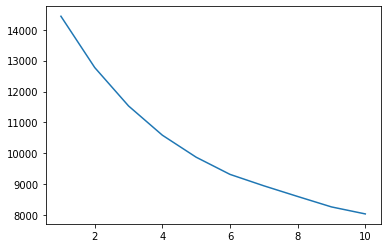

In [131]:
elbow_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    elbow_values.append([k, kmeans.inertia_])
elbow_df = pd.DataFrame(elbow_values, columns = ['K','Inertia'])
fig, ax = plt.subplots()
ax.plot(elbow_df['K'], elbow_df['Inertia'])

Text(0, 0.5, 'Distance')

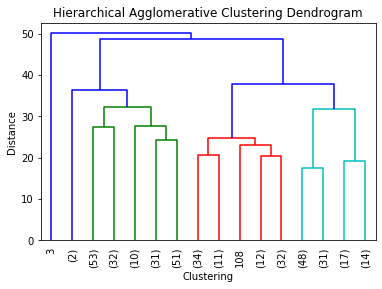

In [143]:
link = linkage(x, 'ward')
dendrogram(link, truncate_mode='lastp', p=16, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Clustering')
plt.ylabel('Distance')


In [ ]:
hclustering = AgglomerativeClustering(n_clusters=4, affinity='euclidiean', linkage='ward')
hclustering.fit(df)
accuracy_score(df, )
